In [120]:
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
from pylidc.utils import volume_viewer

In [69]:
# Query for all CT scans with desired traits.
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1,
                                 pl.Scan.pixel_spacing <= 0.6)
print(scans.count())
# => 31

pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

31


In [70]:
print(len(scan.annotations))

4


In [71]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))
# => Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))
# => Nodule 1 has 4 annotations.
# => Nodule 2 has 4 annotations.
# => Nodule 3 has 1 annotations.
# => Nodule 4 has 4 annotations.

Scan(id=12,patient_id=LIDC-IDRI-0001) has 1 nodules.
Nodule 1 has 4 annotations.


In [72]:
vol = scan.to_volume()
print(vol.shape)
# => (512, 512, 87)

print("%.2f, %.2f" % (vol.mean(), vol.std()))
# => -702.15, 812.52

Loading dicom files ... This may take a moment.
(512, 512, 133)
-826.94, 773.40


Loading dicom files ... This may take a moment.


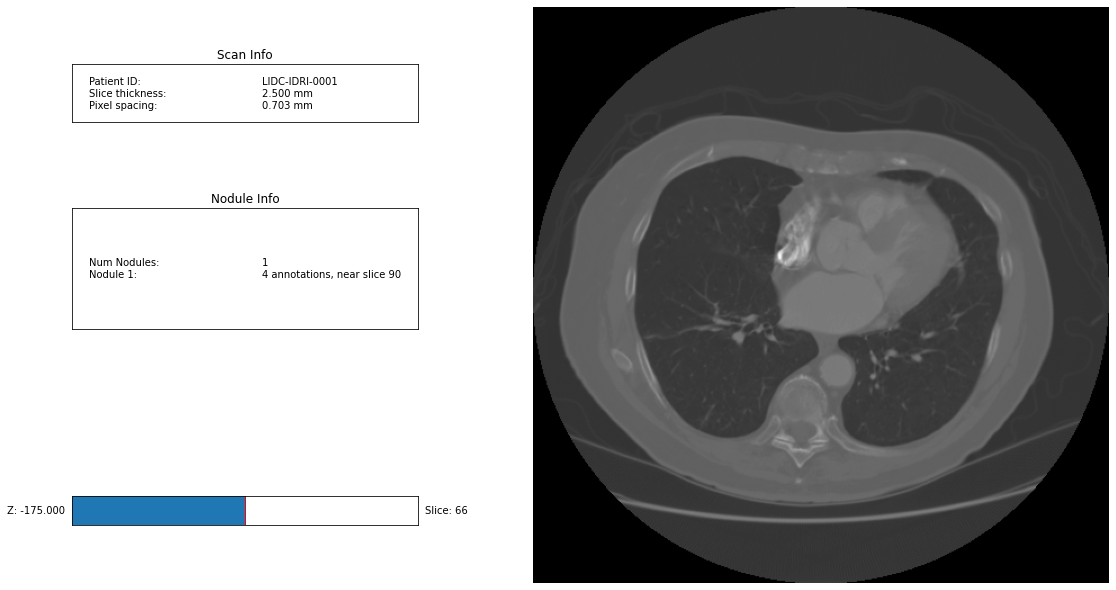

In [73]:
scan.visualize(annotation_groups=nods)

Loading dicom files ... This may take a moment.


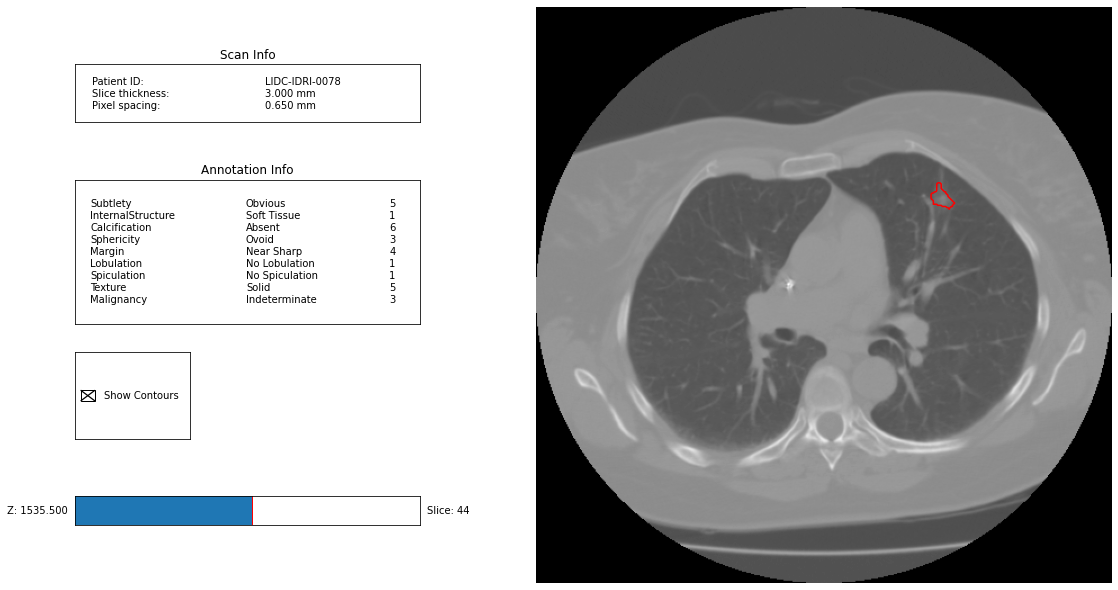

In [94]:
# ann = pl.query(pl.Annotation).first()
# ann = pl.query(pl.Annotation)
ann = pl.query(pl.Annotation).filter(pl.Scan.patient_id == pid).first()
ann.visualize_in_scan()

<class 'numpy.ndarray'>
(34, 27, 6)


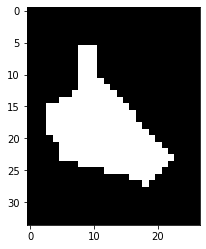

In [88]:
mask = ann.boolean_mask()
print (type(mask))
print (mask.shape)
plt.imshow(mask[:,:,0], cmap = "gray")

Loading dicom files ... This may take a moment.
<class 'numpy.ndarray'>
k: 47 ii: [182 181 181 180 180 180 179 178 177 176 175 174 173 172 171 170 169 168
 167 166 165 164 163 162 161 161 160 160 160 160 160 159 159 158 158 158
 158 158 159 160 160 160 160 161 162 163 164 165 166 166 167 168 168 169
 170 171 172 173 174 175 176 177 178 179 179 179 180 181 181 181 181 182] jj: [361 362 363 364 365 366 367 368 368 368 368 369 369 369 370 370 370 371
 371 371 371 371 372 372 372 371 370 369 368 367 366 365 364 363 362 361
 360 359 358 357 356 355 354 353 353 352 352 351 350 349 349 349 350 351
 351 351 351 351 351 351 352 352 352 353 354 355 356 357 358 359 360 361]


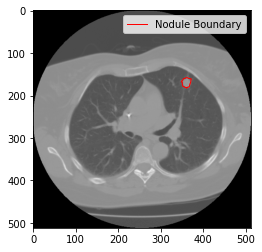

In [115]:
a = 2
ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()
print (type(vol))
con = ann.contours[a]
k = con.image_k_position
ii,jj = ann.contours[a].to_matrix(include_k=False).T
print ('k:',k, 'ii:', ii, 'jj:',jj)
plt.imshow(vol[:,:,46], cmap=plt.cm.gray)
plt.plot(jj, ii, '-r', lw=1, label="Nodule Boundary")
plt.legend()
plt.show()

In [117]:
mask = ann.boolean_mask()
plt.imshow(mask[:,:,46], cmap = "gray")

IndexError: index 46 is out of bounds for axis 2 with size 6

Loading dicom files ... This may take a moment.
(slice(113, 223, None), slice(308, 417, None), slice(34, 60, None))


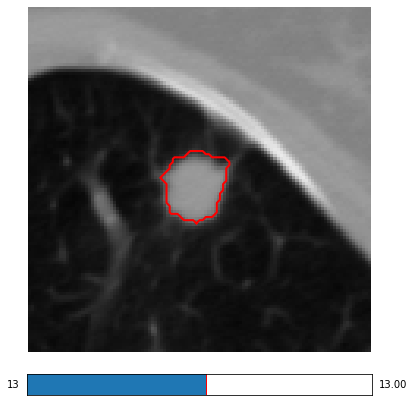

In [124]:
ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()
padding = 70.0
mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)
print (bbox)
volume_viewer(vol[bbox], mask, ls='-', lw=2, c='r')